In [5]:
import pandas as pd
import h5py
import matplotlib.pyplot as plt
import numpy as np
import corner
from copy import deepcopy
import glob

from scipy.stats import dirichlet

import sys
sys.path.append('../')
from populations.bbh_models import get_models
import populations.bbh_models as read_models
from populations.bbh_models import read_hdf5
from populations import gw_obs
import seaborn as sns
cp = sns.color_palette("colorblind", 6)

PyCBC.libutils: pkg-config call failed, setting NO_PKGCONFIG=1


glasflow is using its own internal version of nflows


In [2]:
plt.rcParams["figure.figsize"] = (15,15)
ls = ['-', '--', ':', '-.', '--']



channels = ['CE','CHE','GC','NSC','SMT']

def plot_BFs_seeds(filenames, second_files=None, labels = [None,None]):
    h_max = 0
    submodels_dict= {0: {0: 'chi00', 1: 'chi01', 2: 'chi02', 3: 'chi05'}, \
    1: {0: 'alpha02', 1: 'alpha05', 2: 'alpha10', 3: 'alpha20', 4: 'alpha50'}}
    Nhyper =2

    for hyper_idx in [0, 1]:
        fig, ax_margs = plt.subplots(5,len(filenames))

        for i, filename in enumerate(filenames):

            try:
                file = h5py.File(filename, 'r')
            except:
                continue
            samples_allchains = np.hstack([file['model_selection']['samples']['block1_values'], file['model_selection']['samples']['block0_values']])
            basemdl_samps = len(np.argwhere(samples_allchains[:,hyper_idx]==0).flatten())

            if second_files:
                try:
                    comp_file = h5py.File(second_files[i], 'r')
                except:
                    continue
                
                samples_allchains_comp = np.hstack([comp_file['model_selection']['samples']['block1_values'], comp_file['model_selection']['samples']['block0_values']])
                basemdl_samps_comp = len(np.argwhere(samples_allchains_comp[:,hyper_idx]==0).flatten())

            for midx, model in submodels_dict[hyper_idx].items():
                smdl_locs = np.argwhere(samples_allchains[:,hyper_idx]==midx).flatten()

                if second_files:
                    comp_smdl_locs = np.argwhere(samples_allchains_comp[:,hyper_idx]==midx).flatten()

                for cidx, channel in enumerate(channels):
                    h, bins, _ = ax_margs[cidx, i].hist(samples_allchains[smdl_locs, cidx+Nhyper], \
                        histtype='step', color=cp[midx], bins=50, ls='-', lw=1.5+(0.2*i), \
                            alpha=0.7, label=model+labels[0])
                    if second_files:
                        h, bins, _ = ax_margs[cidx, i].hist(samples_allchains_comp[comp_smdl_locs, cidx+Nhyper], \
                            histtype='stepfilled', color=cp[midx], bins=50, \
                            alpha=0.3, label=model+labels[1])
                        h, bins, _ = ax_margs[cidx, i].hist(samples_allchains_comp[comp_smdl_locs, cidx+Nhyper], \
                            histtype='step', color=cp[midx], bins=50, \
                            alpha=0.7)
                    h_max = h.max() if h.max() > h_max else h_max

            # format plot
            for cidx, (channel, ax_marg) in enumerate(zip(channels, ax_margs)):

                # legend
                if i==0:
                    ax_marg[i].set_ylabel(f"{channel}", fontsize=30)
                    
                if cidx == 0 and i ==len(filenames)-1:
                    ax_marg[i].legend(loc='center', bbox_to_anchor=[1.2,1.0], prop={'size':10})

                if cidx == len(channels)-1:
                    ax_marg[i].set_xlabel(r"$\beta$", fontsize=30)

                ax_marg[i].set_yscale('log')

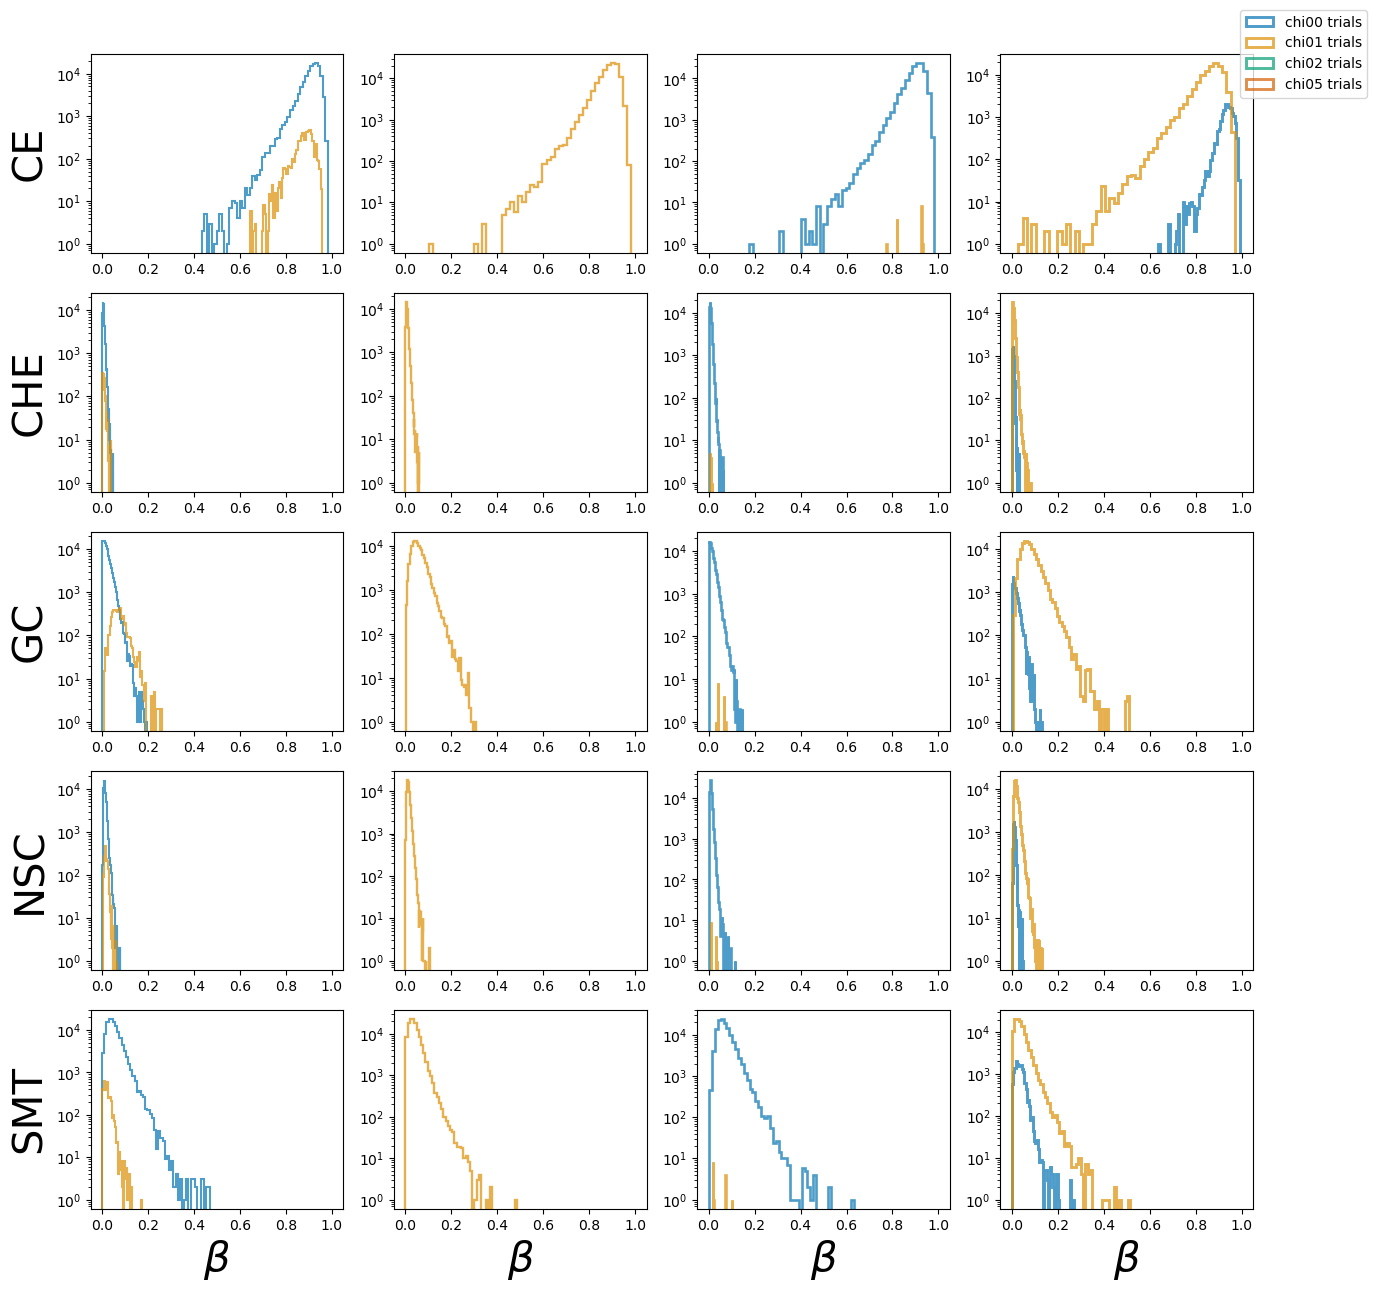

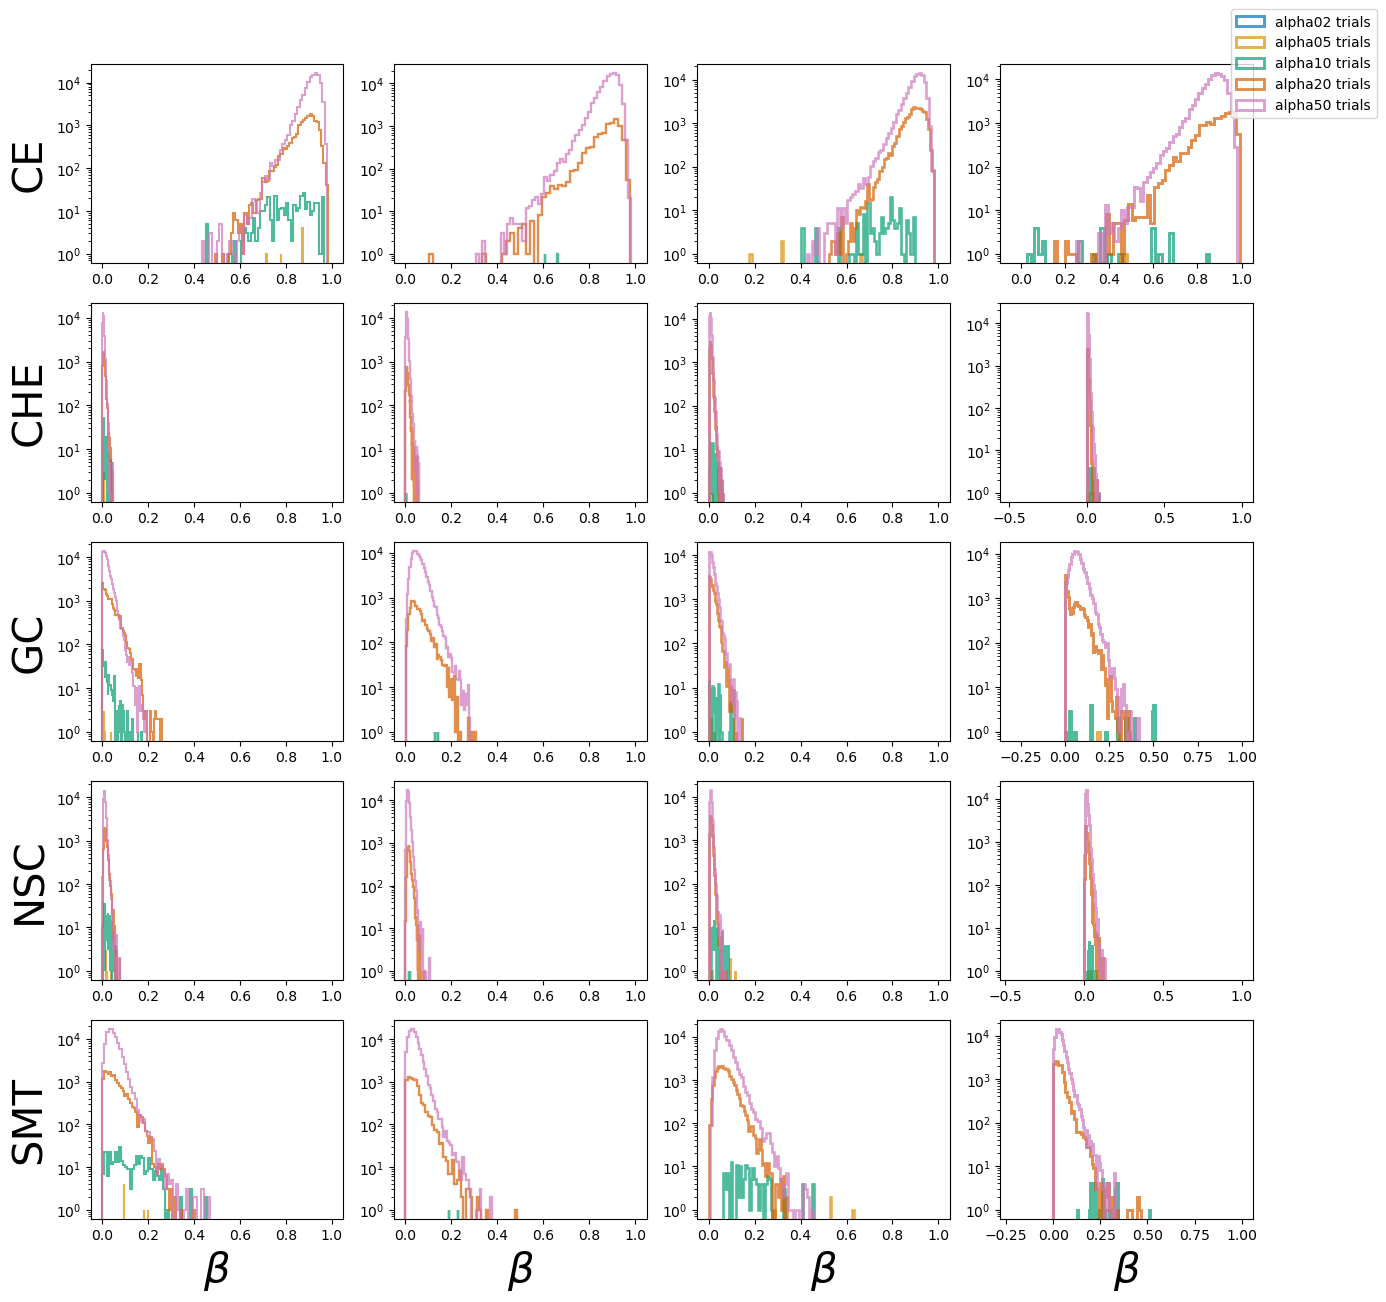

In [9]:
trials_files = ['gwtc-3/gwobs/output_0.hdf5',
 'gwtc-3/gwobs/output_1.hdf5',
 'gwtc-3/gwobs/output_2.hdf5',
 'gwtc-3/gwobs/output_34.hdf5']


plot_BFs_seeds(trials_files, labels=[' trials'])